# DBSCAN (Density-Based Saptial Clustering of Application with Noise)
- 밀도 기반 (데이터포인트의 간격) 군집 알고리즘


![](https://d.pr/i/Re9qoB+)

![](https://d.pr/i/T3srVy+)

![](https://d.pr/i/tiIr6K+)


**장점**
- 비구형 클러스터 탐지
- 노이즈 데이터 처리
- 비지도 학습 (클러스터 개수를 사전에 알 필요가 없음)

**단점**
- 데이터 밀도가 자주 변하거나 아예 변하지 않으면 군집화 성능 저하
- 특성 개수가 많으면 군집화 성능 저하 (고차원 데이터에서의 밀도 불균형)
- 매개변수 민감성

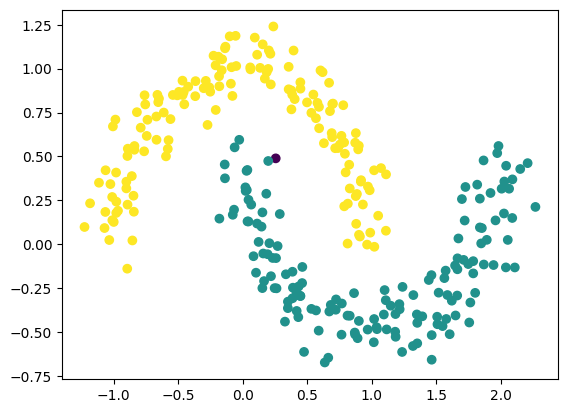

In [3]:
# 반달형 데이터포인트 생성
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)
dbscan = DBSCAN(eps=0.2, min_samples=6) # eps(앱실론, 이웃 정의 거리 반지름, 0.5)

dbscan.fit(X) # 클러스터링 계산

# 데이터포인트 산점도
plt.scatter(X[:,0],X[:,1], c=dbscan.labels_)
plt.show()

---

##### iris 데이터셋에 DBSCAN 적용

In [4]:
# 데이터 로드
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target


In [6]:
# DBSCAN 적용
dbscan = DBSCAN(eps=0.6, min_samples=4)
dbscan.fit_predict(iris.data) # dbscan은 transform, predict가 없음
iris_df['cluster'] = dbscan.labels_
iris_df.groupby('target')['cluster'].value_counts()


target  cluster
0        0         49
        -1          1
1        1         46
         2          4
2        1         46
        -1          4
Name: count, dtype: int64

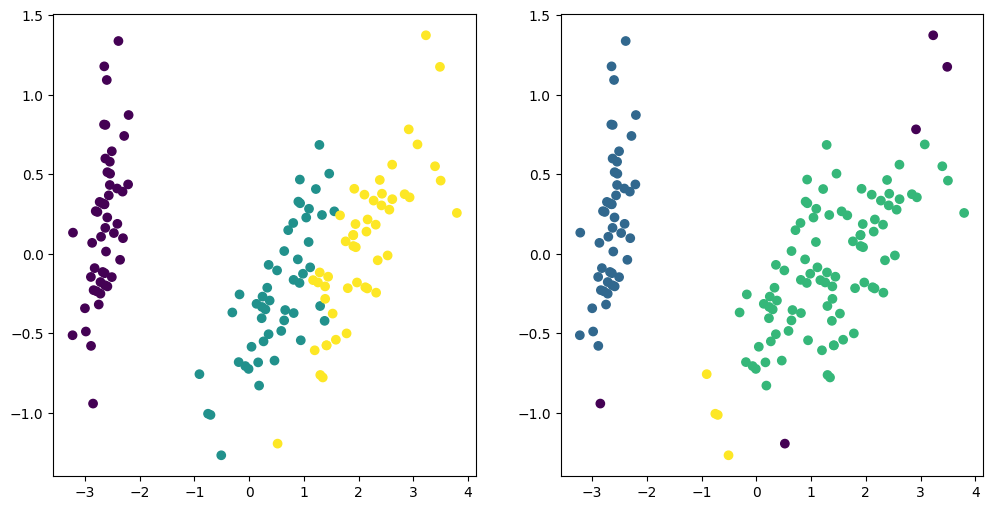

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_transformed = pca.fit_transform(iris.data)
iris_df['pca1'] = pca_transformed[:,0]
iris_df['pca2'] = pca_transformed[:,1]

fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].scatter(iris_df['pca1'], iris_df['pca2'], c=iris_df['target'])
ax[1].scatter(iris_df['pca1'], iris_df['pca2'], c=iris_df['cluster'])
plt.show()